In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import webbrowser
import os
import numpy as np
  
df = pd.read_csv("Tema_4.csv")


# Paleta de colores personalizada
colores = {
    'principal': '#0047AB',   
    'oscuro': '#00264D',      
    'cian': '#00A6ED',        
    'dorado': '#C5A100',      
    'gris': '#E5E5E5'         
}

# Aplicar estilo general
plt.style.use('default')
sns.set_palette([colores['principal']])
sns.set_context("notebook", font_scale=1.0)
plt.rcParams.update({
    'axes.facecolor': 'white',
    'axes.edgecolor': colores['oscuro'],
    'grid.color': '#cccccc',
    'grid.linestyle': '--',
    'grid.alpha': 0.6
})

color_base = colores['principal']


# Análisis Exploratorio

El dataset contiene 4531 filas (registros) y 17 columnas


,Columnas,Tipo de dato,Valores no nulos,Valores nulos,Porcentaje nulos (%)
age,age,object,4305,226,4.99
job,job,object,4305,226,4.99
marital,marital,object,4305,226,4.99
education,education,object,4305,226,4.99
default,default,object,4305,226,4.99
balance,balance,float64,4306,225,4.97
housing,housing,object,4305,226,4.99
loan,loan,object,4304,227,5.01
contact,contact,object,4304,227,5.01
day,day,float64,4304,227,5.01


------------------------- VALORES NULOS DEL DATASET ------------------------


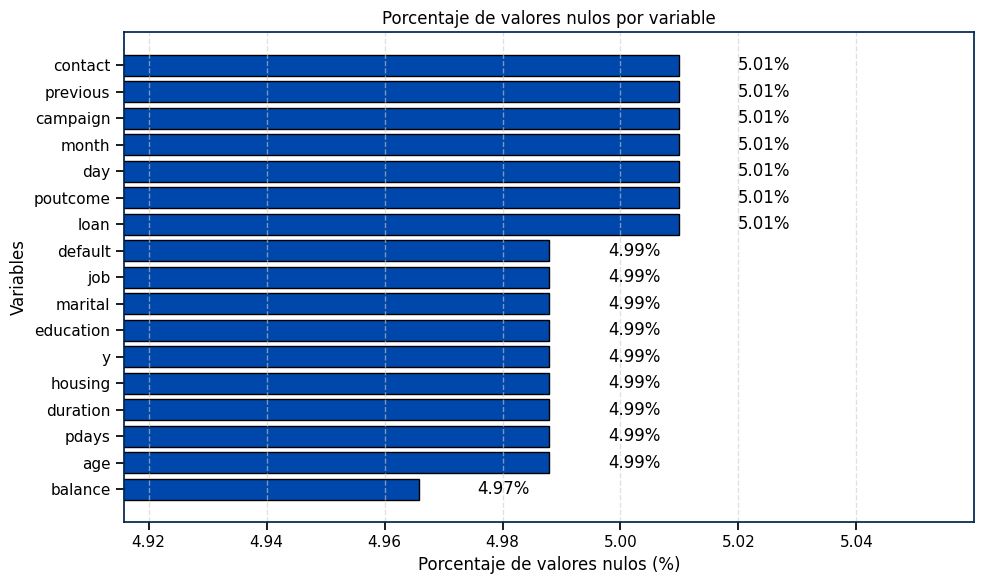

Cantidad de registros duplicados: 10


,count,mean,std,min,25%,50%,75%,max,rango
balance,4306.0,8829.596609,72317.091425,-3313.0,70.0,453.5,1538.25,711880.0,715193.0
day,4304.0,15.922630,8.240703,1.0,9.0,16.0,21.00,31.0,30.0
duration,4305.0,264.458304,261.527707,4.0,104.0,185.0,330.00,3025.0,3021.0
campaign,4304.0,2.780901,3.072688,1.0,1.0,2.0,3.00,50.0,49.0
pdays,4305.0,39.794657,100.257056,-1.0,-1.0,-1.0,-1.00,871.0,872.0
previous,4304.0,0.533457,1.673374,0.0,0.0,0.0,0.00,25.0,25.0


Sesgo (skewness) de las variables numéricas:


balance     9.607852
previous    5.939112
campaign    4.829506
duration    2.796322
pdays       2.727618
day         0.093361
dtype: float64

Cantidad de outliers por variable:


balance     486
day           0
duration    310
campaign    299
pdays       777
previous    773
dtype: int64

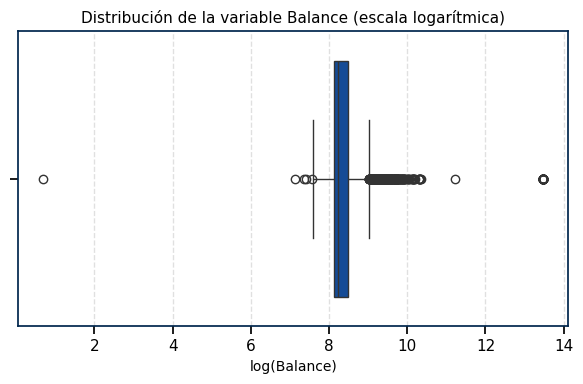

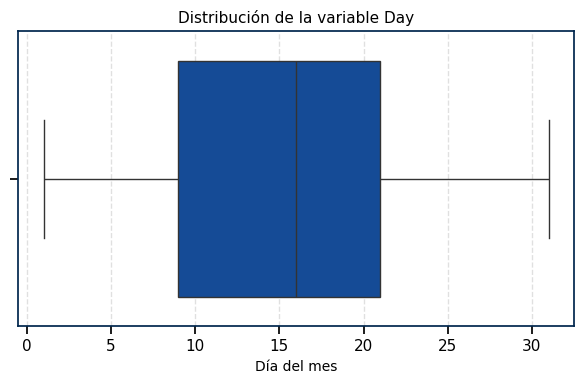

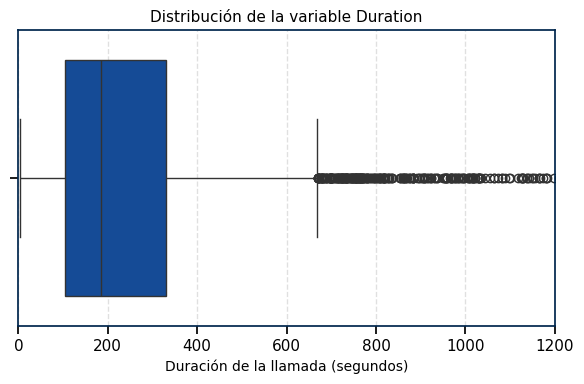

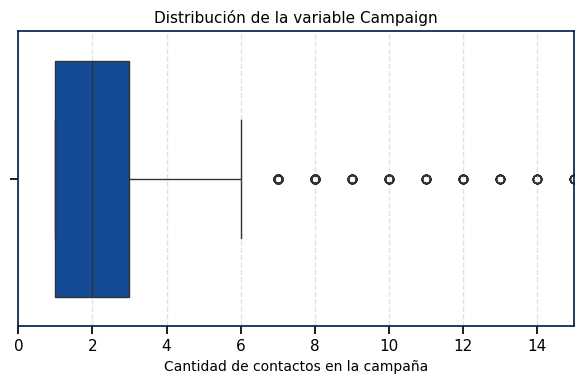

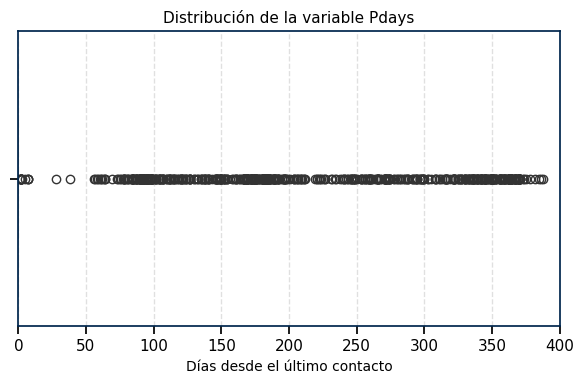

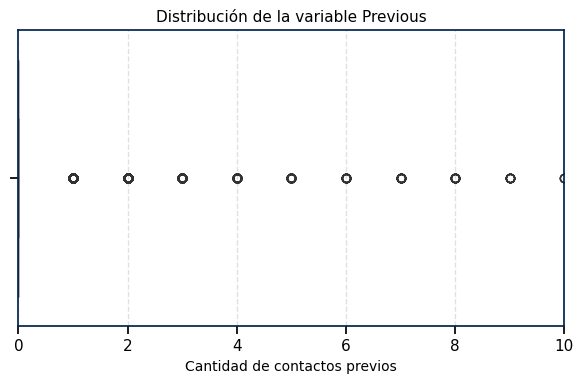

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 106.86it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

-------------------- DISTRIBUCIÓN DE VARIABLES NUMÉRICAS CONTÍNUAS --------------------


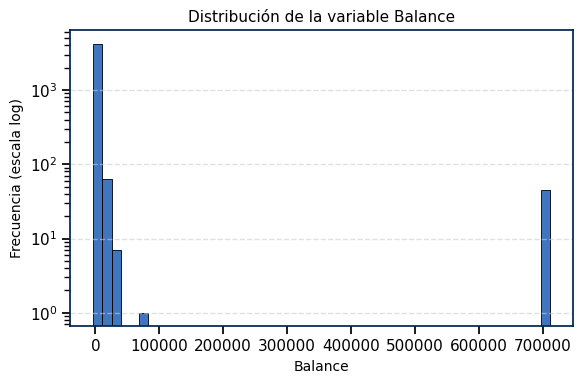

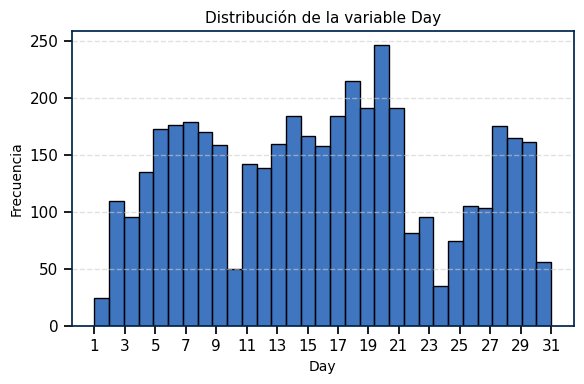

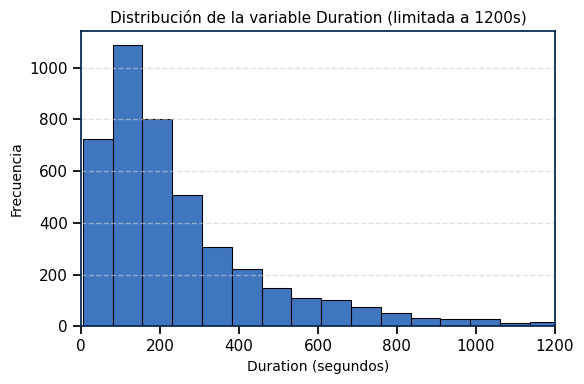

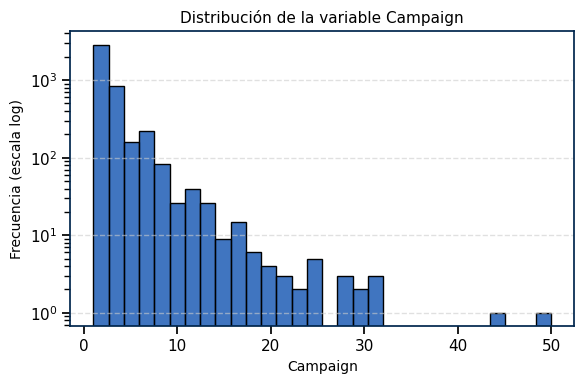

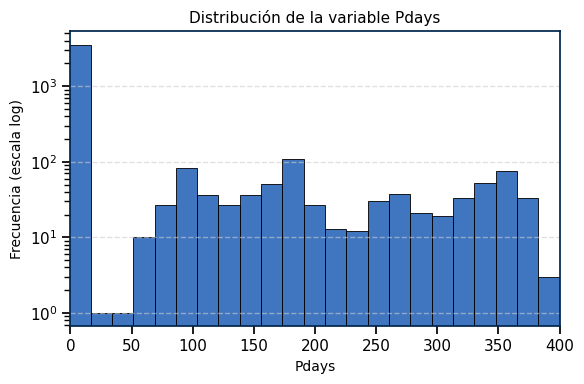

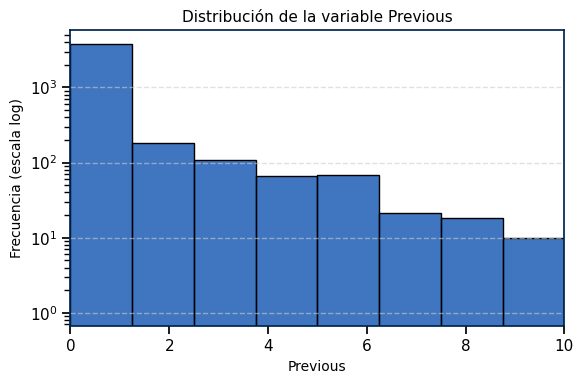

-------------------- DISTRIBUCIÓN DE VARIABLES BINARIAS --------------------


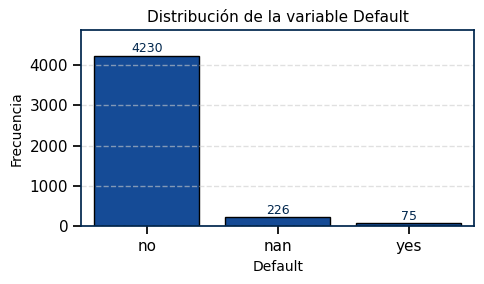

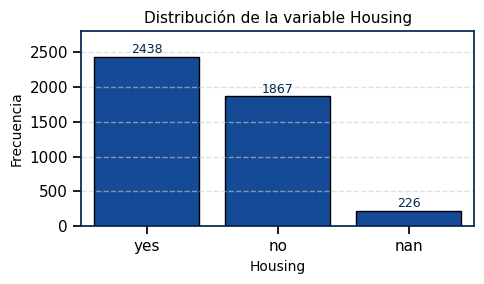

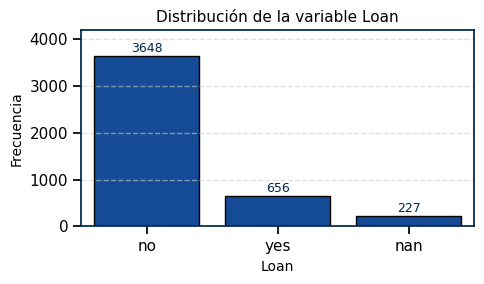

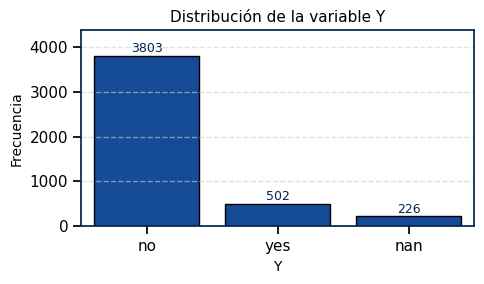

-------------------- DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS --------------------


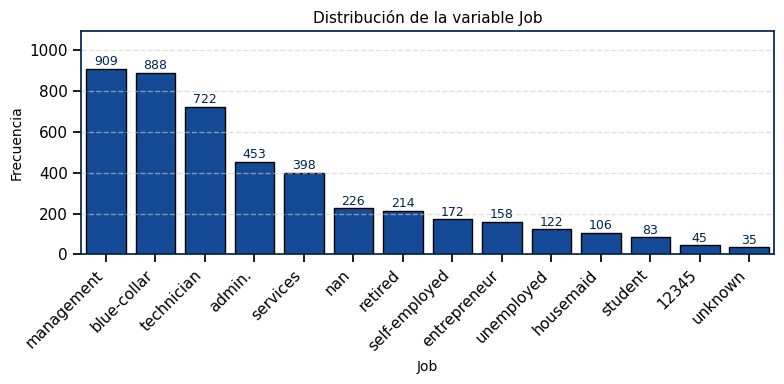

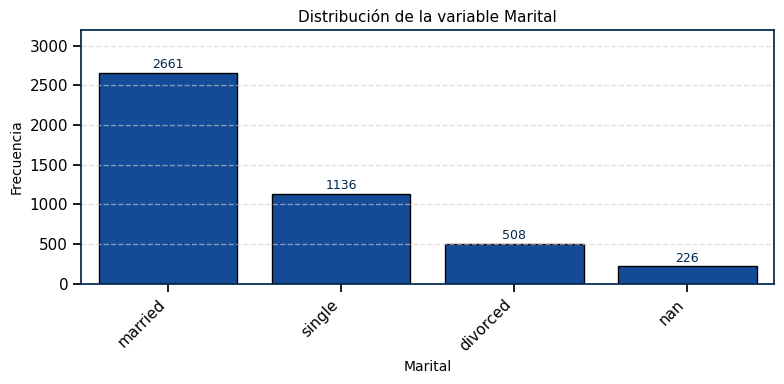

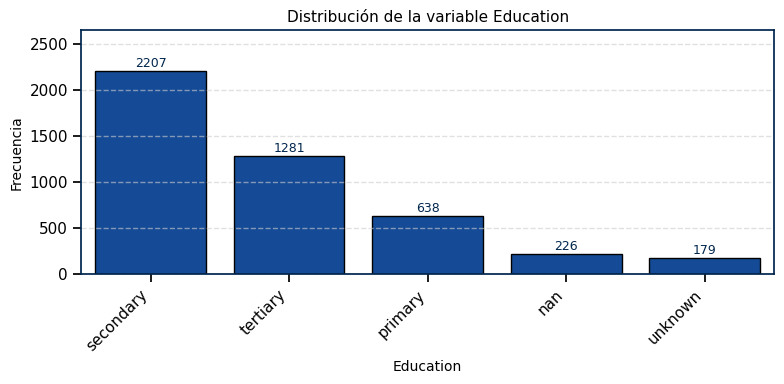

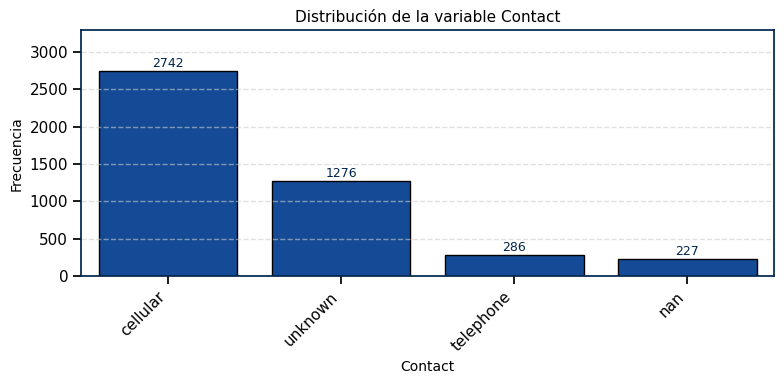

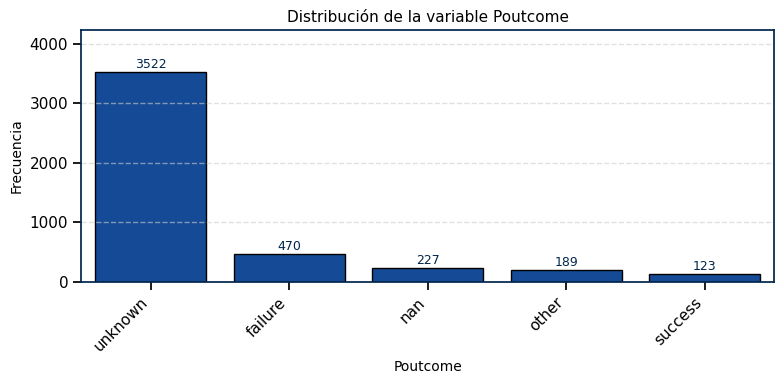

In [2]:
%matplotlib inline

print(f"El dataset contiene {df.shape[0]} filas (registros) y {df.shape[1]} columnas")

filas = df.shape[0]
columnas = df.shape[1]
total_celdas = df.size

info_df = pd.DataFrame({
    'Columnas': df.columns,
    'Tipo de dato': df.dtypes,
    'Valores no nulos': df.notnull().sum(),
    'Valores nulos': df.isnull().sum(),
    'Porcentaje nulos (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

display(info_df)

print("------------------------- VALORES NULOS DEL DATASET ------------------------")
porcentaje_nulos = (df.isna().mean() * 100).sort_values()

plt.figure(figsize=(10,6))
plt.barh(porcentaje_nulos.index, porcentaje_nulos.values, color=color_base, edgecolor='black')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Variables')
plt.title('Porcentaje de valores nulos por variable')

for i, v in enumerate(porcentaje_nulos.values):
    plt.text(v + 0.01, i, f"{v:.2f}%", va='center')

minv, maxv = porcentaje_nulos.min(), porcentaje_nulos.max()
plt.xlim(minv - 0.05, maxv + 0.05)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Chequeo de duplicados
duplicados = df.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicados}")

# Estadísticos descriptivos y rango
variables_numericas = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
stats = df[variables_numericas].describe().T
stats["rango"] = stats["max"] - stats["min"]
display(stats)

# Sesgo (skewness)
sesgo = df[variables_numericas].skew().sort_values(ascending=False)
print("Sesgo (skewness) de las variables numéricas:")
display(sesgo)

# Outliers Qi
Q1 = df[variables_numericas].quantile(0.25)
Q3 = df[variables_numericas].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[variables_numericas] < (Q1 - 1.5 * IQR)) | (df[variables_numericas] > (Q3 + 1.5 * IQR))).sum()
print("Cantidad de outliers por variable:")
display(outliers)

# Boxplots para variables numéricas

# --- Balance ---
plt.figure(figsize=(6,4))

sns.boxplot(x=np.log1p(df['balance'] - df['balance'].min() + 1), color=color_base)

plt.title('Distribución de la variable Balance (escala logarítmica)', fontsize=11)
plt.xlabel('log(Balance)', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# --- Day ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['day'], color=color_base)
plt.title('Distribución de la variable Day', fontsize=11)
plt.xlabel('Día del mes', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Duration ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['duration'], color=color_base)
plt.title('Distribución de la variable Duration', fontsize=11)
plt.xlabel('Duración de la llamada (segundos)', fontsize=10)
plt.xlim(0, 1200)  # te muestra la mayoría de llamadas
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Campaign ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['campaign'], color=color_base)
plt.title('Distribución de la variable Campaign', fontsize=11)
plt.xlabel('Cantidad de contactos en la campaña', fontsize=10)
plt.xlim(0, 15)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Pdays ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['pdays'], color=color_base)
plt.title('Distribución de la variable Pdays', fontsize=11)
plt.xlabel('Días desde el último contacto', fontsize=10)
plt.xlim(0, 400)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Previous ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['previous'], color=color_base)
plt.title('Distribución de la variable Previous', fontsize=11)
plt.xlabel('Cantidad de contactos previos', fontsize=10)
plt.xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


profile = ProfileReport(df, title="Tema_4", explorative=True)
profile.to_file("Tema_4.html")

archivo_html = os.path.abspath("Tema_4.html")
webbrowser.open(f"file://{archivo_html}")

variables_binarias = ['default', 'housing', 'loan', 'y']
variables_categoricas = ['job', 'marital', 'education', 'contact', 'poutcome']

print("-------------------- DISTRIBUCIÓN DE VARIABLES NUMÉRICAS CONTÍNUAS --------------------")

# --- BALANCE ---
plt.figure(figsize=(6,4))
sns.histplot(df['balance'], bins=50, color=color_base, edgecolor='black', kde=False)
plt.yscale('log')
plt.title('Distribución de la variable Balance', fontsize=11)
plt.xlabel('Balance', fontsize=10)
plt.ylabel('Frecuencia (escala log)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- DAY ---
plt.figure(figsize=(6,4))
sns.histplot(df['day'], bins=31, color=color_base, edgecolor='black', kde=False)
plt.xticks(range(1,32,2))
plt.title('Distribución de la variable Day', fontsize=11)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- DURATION ---
plt.figure(figsize=(6,4))
sns.histplot(df['duration'], bins=40, color=color_base, edgecolor='black', kde=False)
plt.xlim(0, 1200)
plt.title('Distribución de la variable Duration (limitada a 1200s)', fontsize=11)
plt.xlabel('Duration (segundos)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- CAMPAIGN ---
plt.figure(figsize=(6,4))
sns.histplot(df['campaign'], bins=30, color=color_base, edgecolor='black', kde=False)
plt.yscale('log')
plt.title('Distribución de la variable Campaign', fontsize=11)
plt.xlabel('Campaign', fontsize=10)
plt.ylabel('Frecuencia (escala log)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- PDAYS ---
plt.figure(figsize=(6,4))
sns.histplot(df['pdays'], bins=50, color=color_base, edgecolor='black', kde=False)
plt.xlim(0, 400)
plt.yscale('log')
plt.title('Distribución de la variable Pdays', fontsize=11)
plt.xlabel('Pdays', fontsize=10)
plt.ylabel('Frecuencia (escala log)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- PREVIOUS ---
plt.figure(figsize=(6,4))
sns.histplot(df['previous'], bins=20, color=color_base, edgecolor='black', kde=False)
plt.xlim(0, 10)
plt.yscale('log')
plt.title('Distribución de la variable Previous', fontsize=11)
plt.xlabel('Previous', fontsize=10)
plt.ylabel('Frecuencia (escala log)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("-------------------- DISTRIBUCIÓN DE VARIABLES BINARIAS --------------------")
for col in variables_binarias:
    plt.figure(figsize=(5,3))
    valores = df[col].value_counts(dropna=False)

    sns.barplot(
        x=valores.index.astype(str),
        y=valores.values,
        color=color_base,
        edgecolor='black'
    )
    
    plt.ylim(0, valores.max() * 1.15)
    plt.title(f'Distribución de la variable {col.capitalize()}', fontsize=11)
    plt.xlabel(col.capitalize(), fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for i, v in enumerate(valores.values):
        plt.text(i, v + (valores.max() * 0.02), str(v), ha='center', fontsize=9, color=colores['oscuro'])
    
    plt.tight_layout()
    plt.show()

print("-------------------- DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS --------------------")
for col in variables_categoricas:
    plt.figure(figsize=(8,4))
    valores = df[col].value_counts(dropna=False).sort_values(ascending=False)
    
    sns.barplot(
        x=valores.index.astype(str),
        y=valores.values,
        color=color_base,
        edgecolor='black'
    )

    plt.ylim(0, valores.max() * 1.20)
    plt.title(f'Distribución de la variable {col.capitalize()}', fontsize=11)
    plt.xlabel(col.capitalize(), fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for i, v in enumerate(valores.values):
        plt.text(i, v + (valores.max() * 0.02), str(v), ha='center', fontsize=9, color=colores['oscuro'])
    
    plt.tight_layout()
    plt.show()

# Limpieza de datos e imputaciones

### Eliminación de duplicados

In [3]:
df_cleaned = df.copy()

# Eliminar duplicados 100% iguales
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
if num_duplicados > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Se eliminaron {num_duplicados} filas duplicadas.")


Se eliminaron 10 filas duplicadas.


### Tratamiento de la varible Age

In [4]:
print("-------------------- LIMPIEZA DE LA VARIABLE AGE --------------------")

df_cleaned['age'] = pd.to_numeric(
    df_cleaned['age'].replace(['unknown', 'unknown_age', 'NA', 'na', 'None'], np.nan),
    errors='coerce'
)

rango_valido = (df_cleaned['age'] >= 18) & (df_cleaned['age'] <= 100)
filas_fuera_rango = df_cleaned.loc[~rango_valido, 'age'].count()

df_cleaned = df_cleaned[rango_valido]

print(f"Se eliminaron {filas_fuera_rango} filas con edades fuera del rango [18, 100].")

mediana_edad = df_cleaned['age'].median()
df_cleaned['age'].fillna(mediana_edad, inplace=True)

print(f"Se imputaron {df_cleaned['age'].isna().sum()} valores nulos con la mediana ({mediana_edad:.0f} años).")


-------------------- LIMPIEZA DE LA VARIABLE AGE --------------------
Se eliminaron 44 filas con edades fuera del rango [18, 100].
Se imputaron 0 valores nulos con la mediana (39 años).


/var/folders/w5/r4237v9175jgsj0grkn8tkhr0000gn/T/ipykernel_79257/1538470237.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['age'].fillna(mediana_edad, inplace=True)


### Tratamiento de la variable Job

In [5]:
print("-------------------- LIMPIEZA DE LA VARIABLE JOB --------------------")

# Verificar valores únicos y frecuencias
df_cleaned['job'].value_counts(dropna=False)

df_cleaned['job'] = df_cleaned['job'].astype(str).str.strip().str.lower()

# Correcciones específicas
df_cleaned['job'] = df_cleaned['job'].replace({
    'admin.': 'admin',
    '12345': 'unknown',   
    'nan': 'unknown',   
    'none': 'unknown'
})

# Reemplazar valores nulos reales (NaN) por 'unknown'
df_cleaned['job'] = df_cleaned['job'].fillna('unknown')

-------------------- LIMPIEZA DE LA VARIABLE JOB --------------------


### Tratamiento de variable Marital

In [6]:
df_cleaned['marital'].value_counts(dropna=False)

# Normalizar texto: minúsculas y quitar espacios
df_cleaned['marital'] = df_cleaned['marital'].astype(str).str.strip().str.lower()

# Correcciones de escritura y agrupaciones
df_cleaned['marital'] = df_cleaned['marital'].replace({
    'nan': 'unknown',         
    'none': 'unknown'
})

# Reemplazar valores nulos reales (NaN) por 'unknown'
df_cleaned['marital'] = df_cleaned['marital'].fillna('unknown')

# Verificación final
print("Valores únicos normalizados:")
print(df_cleaned['marital'].value_counts())


Valores únicos normalizados:
marital
married     2482
single      1052
divorced     463
unknown      210
Name: count, dtype: int64


### Tratamiento de variable Education

In [7]:
# Normalización
df_cleaned['education'] = df_cleaned['education'].astype(str).str.strip().str.lower()

# Correcciones de texto
df_cleaned['education'] = df_cleaned['education'].replace({
    'basic.4y': 'primary',
    'basic.6y': 'primary',
    'basic.9y': 'secondary',
    'university.degree': 'tertiary',
    'high.school': 'secondary',
    'illiterate': 'primary',
    'nan': 'unknown',
    'none': 'unknown'
})

# Reemplazo de nulos por 'unknown'
df_cleaned['education'] = df_cleaned['education'].fillna('unknown')

print(df_cleaned['education'].value_counts())

imputacion_por_job = {
    'management': 'tertiary',
    'technician': 'tertiary',
    'entrepreneur': 'tertiary',
    'self-employed': 'tertiary',
    'admin': 'secondary',
    'services': 'secondary',
    'blue-collar': 'primary',
    'housemaid': 'primary',
    'unemployed': 'primary',
    'student': 'tertiary',
    'retired': 'unknown',
    'unknown': 'unknown'
}

mask = (df_cleaned['education'].isin(['unknown', 'nan'])) & (df_cleaned['job'].notna())
df_cleaned.loc[mask, 'education'] = df_cleaned.loc[mask, 'job'].map(imputacion_por_job).fillna('unknown')

education
secondary    2039
tertiary     1190
primary       599
unknown       379
Name: count, dtype: int64


### Tratamiento de la variable Default

In [8]:
df_cleaned['default'].value_counts(dropna=False)

# Normalizar texto (en caso de que existan valores 'yes'/'no' en lugar de booleanos)
df_cleaned['default'] = df_cleaned['default'].astype(str).str.strip().str.lower()

df_cleaned['default'] = df_cleaned['default'].replace({
    'yes': True,
    'no': False,
    'nan': None,
    'none': None
})

# Convertir a tipo booleano
df_cleaned['default'] = df_cleaned['default'].astype('boolean')

# Verificar distribución
print(df_cleaned['default'].value_counts(dropna=False))

# Imputación con False (más del 93% son FALSE - tiene sentido)
df_cleaned['default'] = df_cleaned['default'].fillna(False)

default
False    3931
<NA>      211
True       65
Name: count, dtype: Int64


### Tratamiento de la variable Housing

In [9]:
# Normalizar texto
df_cleaned['housing'] = df_cleaned['housing'].astype(str).str.strip().str.lower()

# Reemplazar valores por booleanos
df_cleaned['housing'] = df_cleaned['housing'].replace({
    'yes': True,
    'no': False,
    'nan': np.nan,
    'none': np.nan
})

# Convertir a tipo booleano
df_cleaned['housing'] = df_cleaned['housing'].astype('boolean')


### Tratamiento de la variable Loan

In [10]:
# Normalizar texto a minúsculas y eliminar espacios
df_cleaned['loan'] = df_cleaned['loan'].astype(str).str.strip().str.lower()

# Reemplazar por valores booleanos
df_cleaned['loan'] = df_cleaned['loan'].replace({
    'yes': True,
    'no': False,
    'nan': np.nan,
    'none': np.nan
})

# Convertir a tipo booleano nativo
df_cleaned['loan'] = df_cleaned['loan'].astype('boolean')

### Tratamiento de la variable Date

In [11]:
# Convertir a numérico y manejar nulos o strings
df_cleaned['day'] = pd.to_numeric(df_cleaned['day'], errors='coerce')

# Eliminar registros con valores fuera del rango 1–31
df_cleaned = df_cleaned[(df_cleaned['day'] >= 1) & (df_cleaned['day'] <= 31)]

# Convertir a entero
df_cleaned['day'] = df_cleaned['day'].astype('Int64')

### Tratamiento de la variable Duration y la variable Y

In [12]:
df_cleaned['y'] = (
    df_cleaned['y']
    .astype(str)
    .str.strip()
    .str.lower()
)

# Reemplazar valores válidos y convertir a booleano
df_cleaned['y'] = df_cleaned['y'].replace({
    'yes': True,
    'no': False,
    'nan': np.nan,
    'none': np.nan
})
df_cleaned['y'] = df_cleaned['y'].astype('boolean')

# 2️Verificar coherencia entre 'y' y 'duration' si duration == 0 → y debe ser False
inconsistentes = df_cleaned[(df_cleaned['duration'] == 0) & (df_cleaned['y'] == True)]
print(f"Registros inconsistentes encontrados: {len(inconsistentes)}")

# Corregir inconsistencias
df_cleaned.loc[(df_cleaned['duration'] == 0) & (df_cleaned['y'] == True), 'y'] = False

# 3️Verificar distribución final de y
print("\nDistribución de la variable objetivo (ya limpia):")
print(df_cleaned['y'].value_counts(dropna=False))

# 4Eliminar la variable 'duration' 
df_cleaned = df_cleaned.drop(columns=['duration'])
print("\nVariable 'duration' eliminada del dataset limpio (para modelado realista).")

Registros inconsistentes encontrados: 0

Distribución de la variable objetivo (ya limpia):
y
False    3348
True      443
<NA>      207
Name: count, dtype: Int64

Variable 'duration' eliminada del dataset limpio (para modelado realista).


### Tratamiento de la variable Campaign

In [13]:
df_cleaned['campaign'].value_counts(dropna=False)

# Asegurar tipo numérico
df_cleaned['campaign'] = pd.to_numeric(df_cleaned['campaign'], errors='coerce')

# valores extremos 
q99 = df_cleaned['campaign'].quantile(0.99)
df_cleaned.loc[df_cleaned['campaign'] > q99, 'campaign'] = np.nan

# Convertir a tipo entero (usando Int64 para permitir NaN)
df_cleaned['campaign'] = df_cleaned['campaign'].astype('Int64')

# Imputar valores faltantes (opcional)
median_campaign = df_cleaned['campaign'].median()
df_cleaned['campaign'] = df_cleaned['campaign'].fillna(median_campaign)

# Verificar resultados
print(df_cleaned['campaign'].describe())


count      3998.0
mean     2.565533
std      2.248527
min           1.0
25%           1.0
50%           2.0
75%           3.0
max          16.0
Name: campaign, dtype: Float64


### Tratamiento de la variable pdays

In [14]:
# Asegurar tipo numérico
df_cleaned['pdays'] = pd.to_numeric(df_cleaned['pdays'], errors='coerce')

# Reemplazar el valor especial -1 por NaN (sin contacto previo)
df_cleaned.loc[df_cleaned['pdays'] == -1, 'pdays'] = np.nan

# 3Convertir a tipo entero (usando Int64 para permitir NaN)
df_cleaned['pdays'] = df_cleaned['pdays'].astype('Int64')

# Verificar distribución final
print(df_cleaned['pdays'].describe())
print("\nValores nulos totales:", df_cleaned['pdays'].isna().sum())

count         705.0
mean     225.398582
std      117.429119
min             1.0
25%           136.0
50%           190.0
75%           330.0
max           871.0
Name: pdays, dtype: Float64

Valores nulos totales: 3293


### Tratamiento de la variable previous

In [15]:
# Asegurar tipo numérico
df_cleaned['previous'] = pd.to_numeric(df_cleaned['previous'], errors='coerce')

# Reemplazar valores negativos por NaN (no deberían existir)
df_cleaned.loc[df_cleaned['previous'] < 0, 'previous'] = np.nan

# Detectar y tratar outliers (por encima del percentil 99)
q99 = df_cleaned['previous'].quantile(0.99)
df_cleaned.loc[df_cleaned['previous'] > q99, 'previous'] = np.nan

# Convertir a entero (usando Int64 para permitir NaN)
df_cleaned['previous'] = df_cleaned['previous'].astype('Int64')

# No imputar los nulos: si previous = 0 o NaN, indica cliente nuevo
print(df_cleaned['previous'].describe())

inconsistentes_prev = df_cleaned[(df_cleaned['previous'] == 0) & (df_cleaned['pdays'].notna())]
print(f"Registros inconsistentes encontrados entre 'previous' y 'pdays': {len(inconsistentes_prev)}")

# Corrección automática:
df_cleaned.loc[(df_cleaned['previous'] == 0) & (df_cleaned['pdays'].notna()), 'pdays'] = np.nan


count      3766.0
mean     0.450345
std      1.226772
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           8.0
Name: previous, dtype: Float64
Registros inconsistentes encontrados entre 'previous' y 'pdays': 0


### Tratamiento de la variable Poutcome

In [16]:
print(df_cleaned['poutcome'].value_counts(dropna=False))

# Normalizar texto
df_cleaned['poutcome'] = (
    df_cleaned['poutcome']
    .astype(str)
    .str.strip()
    .str.lower()
)

# Corregir variantes mal escritas o inconsistentes
df_cleaned['poutcome'] = df_cleaned['poutcome'].replace({
    'nonexistant': 'nonexistent', 
    'unknown': 'nonexistent',
    'none': 'nonexistent',
    'nan': np.nan
})

# Convertir a tipo categórico ordenado
df_cleaned['poutcome'] = pd.Categorical(
    df_cleaned['poutcome'],
    categories=['failure', 'nonexistent', 'success'],
    ordered=False
)

# Verificar resultados
print(df_cleaned['poutcome'].value_counts(dropna=False))

inconsistentes_pout = df_cleaned[
    (df_cleaned['previous'] == 0) & (df_cleaned['poutcome'] == 'success')
]
print(f"Registros inconsistentes entre 'previous' y 'poutcome': {len(inconsistentes_pout)}")

# Corrección automática:
df_cleaned.loc[(df_cleaned['previous'] == 0), 'poutcome'] = 'nonexistent'

poutcome
unknown    3092
failure     427
NaN         198
other       167
success     114
Name: count, dtype: int64
poutcome
nonexistent    3092
failure         427
NaN             365
success         114
Name: count, dtype: int64
Registros inconsistentes entre 'previous' y 'poutcome': 0


# Pretratamiento de datos - normalización